In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('dataset.csv')

In [28]:
df

,BatchNo,Value
0,2019-09-01,13.901417
1,2019-09-02,14.123947
2,2019-09-03,13.961538
3,2019-09-04,14.005000
4,2019-09-05,14.090514
...,...,...
66,2019-11-26,13.850474
67,2019-11-27,14.158806
68,2019-11-28,14.103132
69,2019-11-29,14.103132


In [29]:
df = df.drop(['BatchNo'], axis = 1)

In [31]:
df

,Value
0,13.901417
1,14.123947
2,13.961538
3,14.005000
4,14.090514
...,...
66,13.850474
67,14.158806
68,14.103132
69,14.103132


In [32]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.017743
p-value: 0.000000


In [33]:
from pmdarima.arima.utils import ndiffs

y = df.Value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

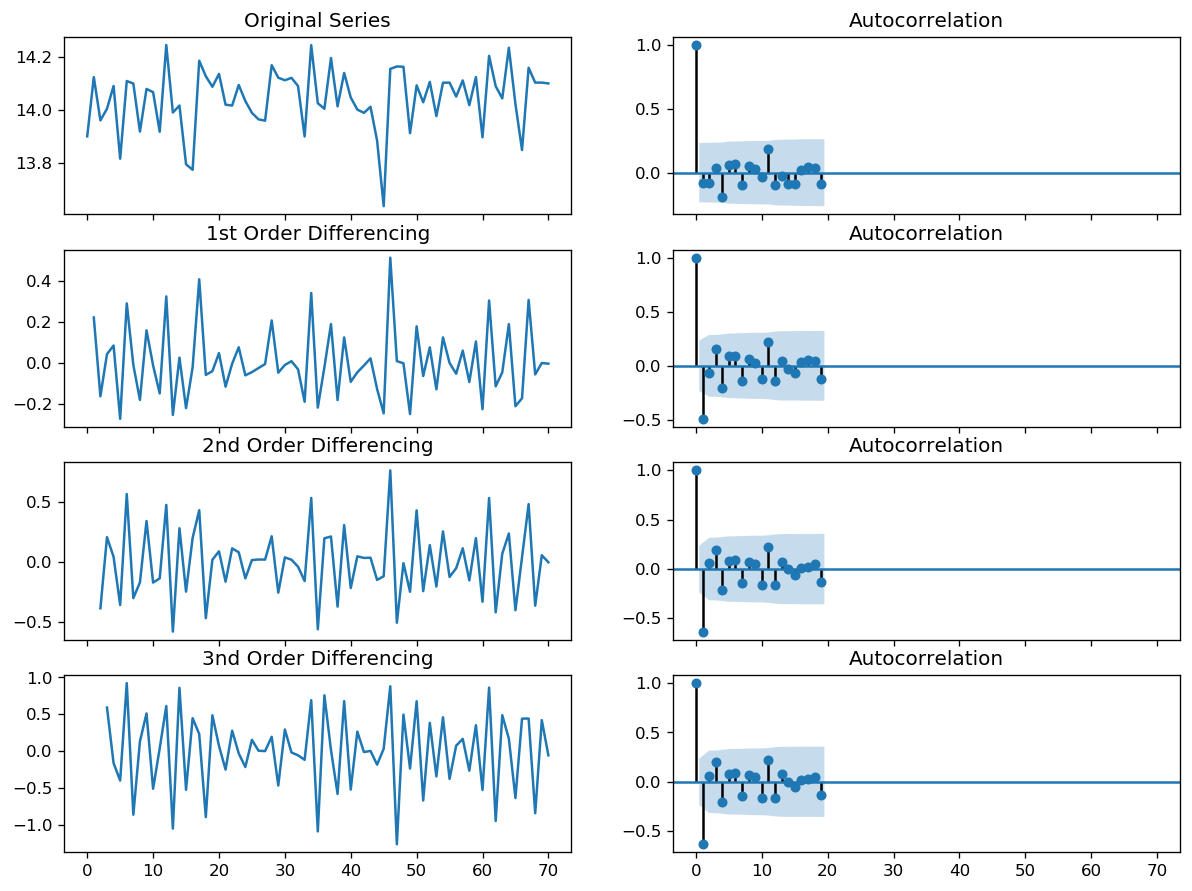

In [36]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,9), 'figure.dpi':120})



# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.Value); axes[0, 0].set_title('Original Series')
plot_acf(df.Value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Value.diff().diff().dropna(), ax=axes[2, 1])

# 2nd Differencing
axes[3, 0].plot(df.Value.diff().diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(df.Value.diff().diff().dropna(), ax=axes[3, 1])

plt.show()

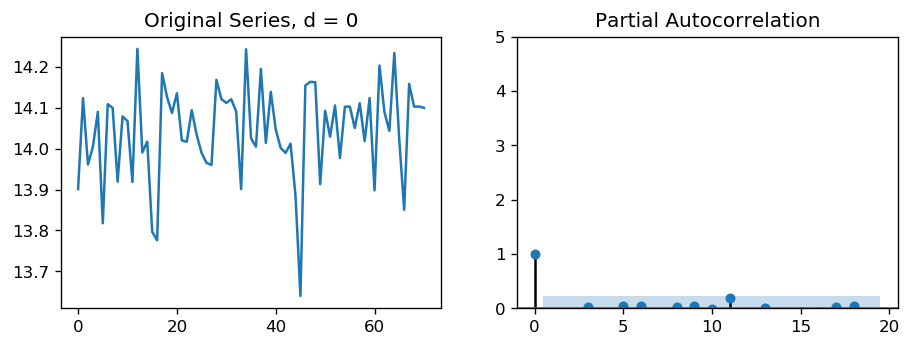

In [37]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.Value); axes[0].set_title('Original Series, d = 0')
axes[1].set(ylim=(0,5))
plot_pacf(df.Value.dropna(), ax=axes[1])

plt.show()

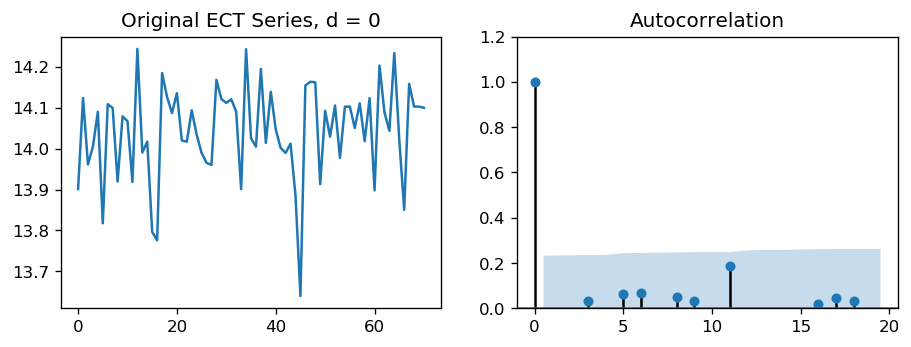

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df.Value); axes[0].set_title('Original ECT Series, d = 0')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Value.dropna(), ax=axes[1])

plt.show()

In [39]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Value, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   70
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  48.172
Method:                       css-mle   S.D. of innovations              0.120
Date:                Wed, 24 Jun 2020   AIC                            -80.344
Time:                        01:24:48   BIC                            -62.356
Sample:                             1   HQIC                           -73.199
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.004      0.326      0.746      -0.006       0.008
ar.L1.D.Value    -0.8868      0.119     -7.422      0.000      -1.121      -0.653
ar.L2.D.Value    -0.7832      0.155     

In [40]:
model = ARIMA(df.Value, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   70
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  48.172
Method:                       css-mle   S.D. of innovations              0.120
Date:                Wed, 24 Jun 2020   AIC                            -80.344
Time:                        01:24:52   BIC                            -62.356
Sample:                             1   HQIC                           -73.199
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.004      0.326      0.746      -0.006       0.008
ar.L1.D.Value    -0.8868      0.119     -7.422      0.000      -1.121      -0.653
ar.L2.D.Value    -0.7832      0.155     

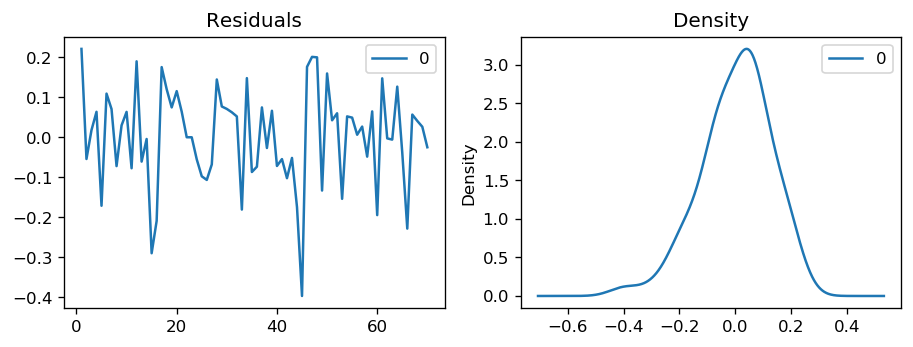

In [41]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

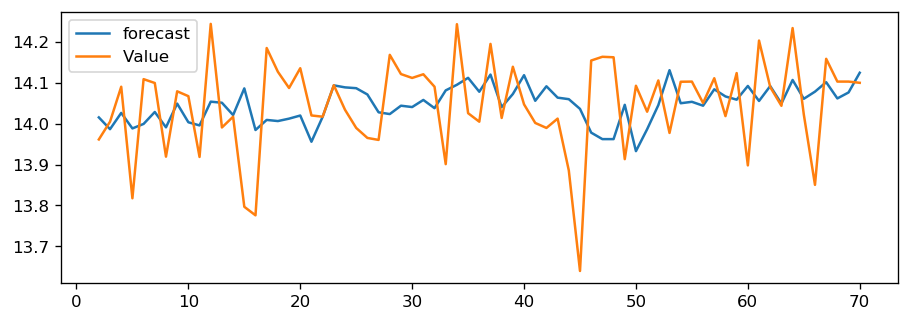

In [42]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [43]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Value[:50]
test = df.Value[50:]

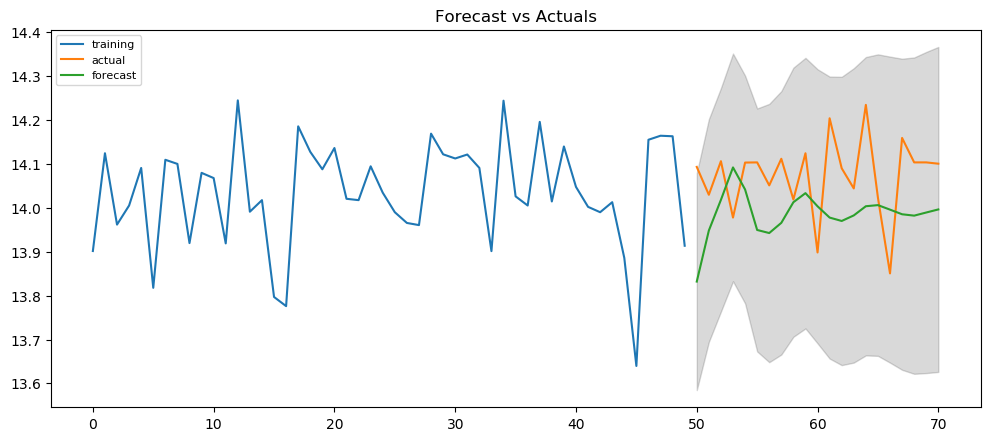

In [44]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(6, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   50
Model:                     ARMA(0, 1)   Log Likelihood                  34.502
Method:                       css-mle   S.D. of innovations              0.121
Date:                Wed, 24 Jun 2020   AIC                            -63.003
Time:                        01:25:15   BIC                            -57.267
Sample:                             0   HQIC                           -60.819
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.0331      0.016    852.880      0.000      14.001      14.065
ma.L1.Value    -0.0432      0.161     -0.268      0.790      -0.359       0.273
                                    Roots       

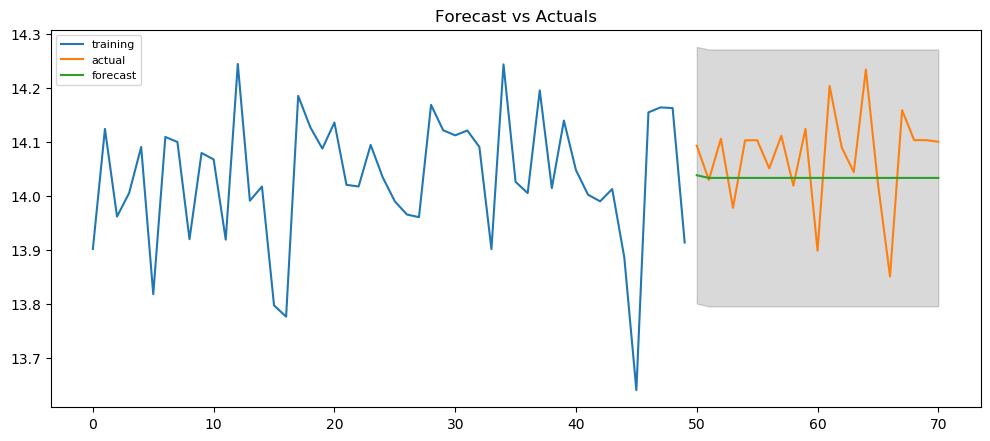

In [45]:
# Build Model
model = ARIMA(train, order=(0, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [46]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.005502107668438187,
 'me': -0.039226026798361194,
 'mae': 0.07747937580994076,
 'mpe': -0.00274926719769861,
 'rmse': 0.09526017275869213,
 'acf1': -0.3791916750093114,
 'corr': 0.052279827642949694,
 'minmax': 0.0054886539665762735}

# AUTO ARIMA

In [47]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df.Value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=-99.518, BIC=-90.467, Fit time=0.058 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-103.143, BIC=-98.617, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-101.596, BIC=-94.808, Fit time=0.037 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=-101.685, BIC=-94.897, Fit time=0.022 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=578.692, BIC=580.955, Fit time=0.005 seconds
Total fit time: 0.141 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   71
Model:                        SARIMAX   Log Likelihood                  53.571
Date:                Wed, 24 Jun 2020   AIC                           -103.143
Time:                        01:25:26   BIC                            -98.617
Sample:                             0   HQIC   

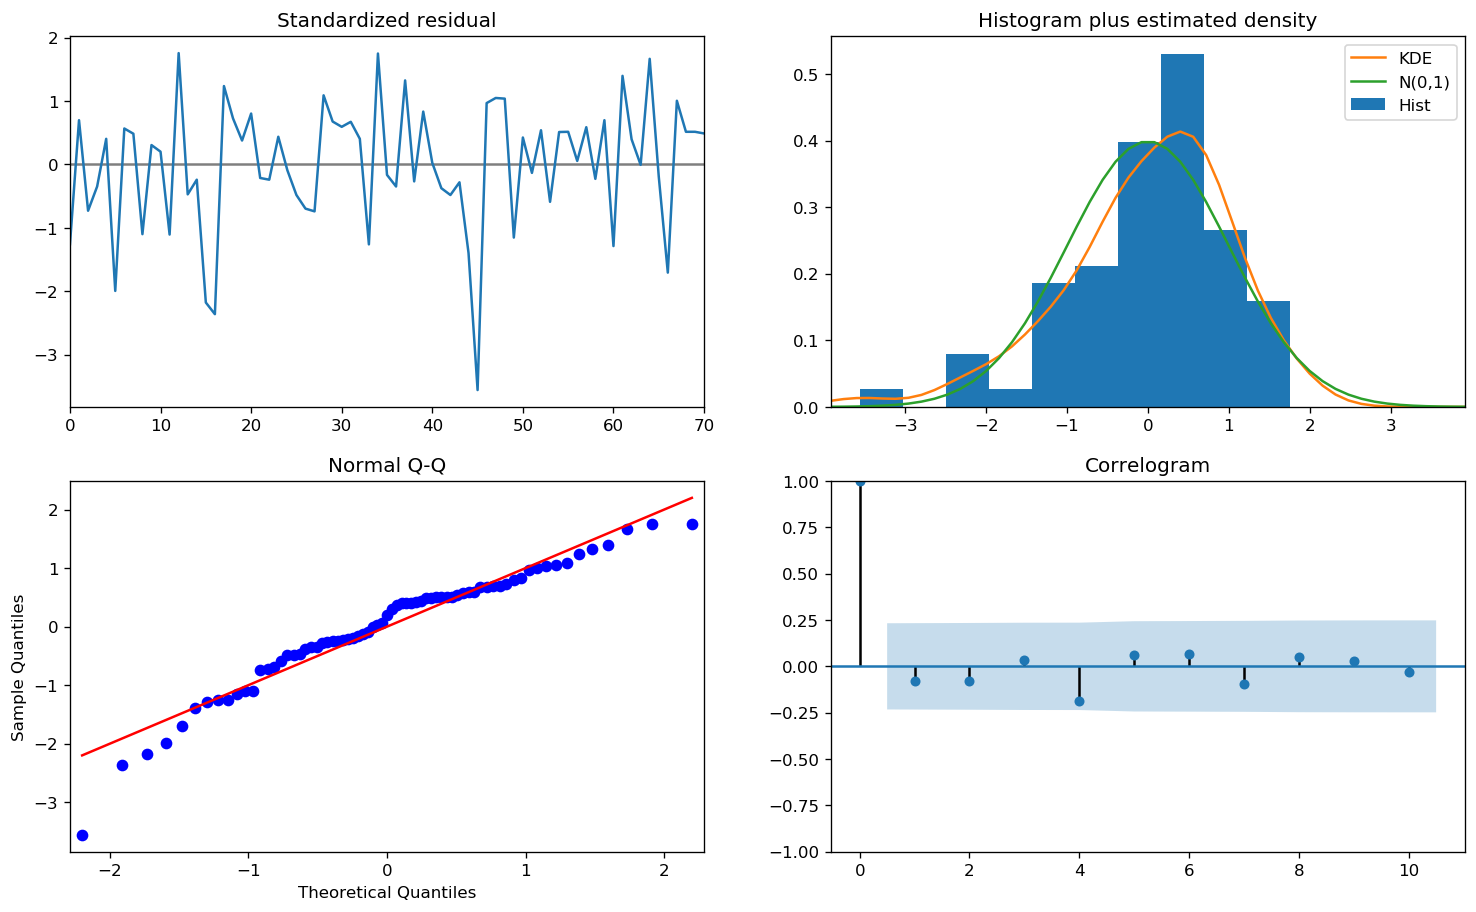

In [48]:
model.plot_diagnostics(figsize=(15,9))
plt.show()

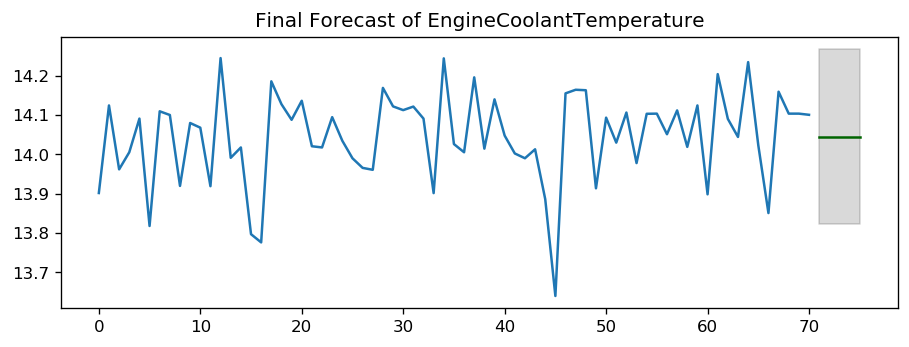

In [50]:
# Forecast
n_periods = 5
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Value), len(df.Value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of EngineCoolantTemperature")
plt.show()